# Final Project Report

* Class: DS 5100
* Student Name:Francis Mangala
* Student Net ID:pgm2qm
* This URL: https://github.com/Franc6s/montecarlo_simulator_pgm2qm/tree/main/Montecarlo_Simulator

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/Franc6s/montecarlo_simulator_pgm2qm/tree/main/Montecarlo_Simulator

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [ ]:
# A code block with your classes.

```
import pandas as pd
import numpy as np

#|-----------------------------------------------------------------------------------|
class Die :
    def __init__(self,sides,weights=None):

     #Takes a NumPy array of faces as an argument. Throws a TypeError if not a NumPy array
        if not isinstance(sides, np.ndarray):
            raise TypeError("Sides must be a NumPy array.")
    #Ensure all face values are unique
        if len(np.unique(sides)) != len(sides):
            raise ValueError("All face values must be unique.")   

        self.sides= sides
    #Initializes the weight to 1.0 for each face
        self.weights = weights if weights is not None else[1.0]* len(sides)
        if len(self.weights) != len(self.sides):
            raise ValueError("Weights and sides must be the same length.")
    #Initialize DataFrame
        self.dice_df = pd.DataFrame({'weight': self.weights}, index=self.sides) 
    
#|-----------------------------------------------------------------------------------|
    def weight_change(self,sides,new_weight):
    #to check if sides is a valid value
        if sides not in self.dice_df.index:
            raise IndexError("Side not valid.")
    #to check if weigh is a valid type
        if not isinstance(new_weight,(int,float)) or new_weight < 0:
            raise TypeError("Weight must be numeric")
        self.dice_df.at[sides,'weight'] = new_weight
#|-----------------------------------------------------------------------------------|
    def roll(self,nrolls=1):
    #to roll the die N times and return an outcome
        if not isinstance(nrolls, int) or nrolls < 1:
            raise ValueError("Number of rolls must be a positive integer.")
        
        sides = self.dice_df.index.to_list()
        weights = np.array(self.dice_df['weight'])
        probability = weights/weights.sum()
        return list(np.random.choice(sides, size=nrolls, p=probability))
#|-----------------------------------------------------------------------------------| 
    def show_die(self):
        return self.dice_df.copy()
#|-----------------------------------------------------------------------------------|

class Game:
    def __init__(self, dice):
        self.dice = dice  # List of Die objects
        self.results = pd.DataFrame()
#|-----------------------------------------------------------------------------------|
    def play(self, nrolls):
   # Rolling all dice n times.
        rolls = []
        for i, die in enumerate(self.dice):
            roll_result = pd.DataFrame(die.roll(nrolls), columns=[f'Die {i+1}'])
            rolls.append(roll_result)

        self.results = pd.concat(rolls, axis=1)
        self.results.index = pd.RangeIndex(start=1, stop=nrolls + 1, name="Roll Number")
        self.results.columns.name = "Die Number" 
#|-----------------------------------------------------------------------------------|
    def show_results(self, format='wide'):
  
    #Show results of the play in 'wide' or 'narrow' format.
    
        if self.results.empty:
            raise ValueError("No results to show. Please run play() first.")

        if format == 'wide':
            return self.results.copy()

        elif format == 'narrow':
            narrow_df = self.results.stack()
            narrow_df.name = "Outcome"  # Set the name directly
            narrow_df = narrow_df.reset_index()  # Now columns will be Roll Number, Die Number, Outcome
            return narrow_df

        else:
            raise ValueError("Invalid format. Choose 'wide' or 'narrow'.")

#|-----------------------------------------------------------------------------------|       
# Assuming Die class has a roll(n) method returning a list of face outcomes
class Analyzer:

    def __init__(self, game):
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        
        self.game = game
        self.results = game.show_results('wide')  # Ensure we always work in wide format
#|-----------------------------------------------------------------------------------|
    # Number of jackpots (all dice showing the same face in a roll)   
    def jackpot(self):
        return int((self.results.nunique(axis=1) == 1).sum())

#|-----------------------------------------------------------------------------------|
    def counts_per_roll(self):
# Computes how many times a given face is rolled        
        unique_faces = np.unique(self.results.values)
        side_count = self.results.apply(lambda row: pd.Series({face: (row == face).sum() for face in unique_faces}), axis=1)
        side_count.index = self.results.index
        return side_count
#|-----------------------------------------------------------------------------------|
    def combo_count(self):
# Computes distinct combinations of faces rolled
        combinations = self.results.apply(lambda row: tuple(sorted(row)), axis=1)
        counts = combinations.value_counts().rename_axis(["Combination"]).to_frame('Count')
        return counts
#|-----------------------------------------------------------------------------------|

    def permutations(self):
        permutations = self.results.apply(lambda row: tuple(row), axis=1)
        counts = permutations.value_counts().to_frame('Count')
        return counts

#||---------------------------------------------------------------------------------||
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [ ]:
# A code block with your test code.
```
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer   

class TestDie(unittest.TestCase):

    def setUp(self):
        self.faces = np.array(['A', 'B', 'C'])
        self.die = Die(self.faces)

    def test_init(self):
        self.assertIsInstance(self.die.dice_df, pd.DataFrame)
        self.assertListEqual(list(self.die.dice_df.index), list(self.faces))

    def test_weight_change(self):
        self.die.weight_change('A', 2.0)
        self.assertEqual(self.die.dice_df.loc['A', 'weight'], 2.0)

    def test_roll(self):
        rolls = self.die.roll(5)
        self.assertIsInstance(rolls, list)
        self.assertEqual(len(rolls), 5)
        self.assertTrue(all(roll in self.faces for roll in rolls))

    def test_show_die(self):
        df = self.die.show_die()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertTrue('weight' in df.columns)


class TestGame(unittest.TestCase):

    def setUp(self):
        die1 = Die(np.array(['1', '2', '3']))
        die2 = Die(np.array(['A', 'B', 'C']))
        self.game = Game([die1, die2])

    def test_play(self):
        self.game.play(5)
        self.assertIsInstance(self.game.results, pd.DataFrame)
        self.assertEqual(self.game.results.shape, (5, 2))  # 5 rolls, 2 dice

    def test_show_results_wide(self):
        self.game.play(3)
        wide_result = self.game.show_results('wide')
        self.assertIsInstance(wide_result, pd.DataFrame)
        self.assertEqual(wide_result.shape, (3, 2))

    def test_show_results_narrow(self):
        self.game.play(3)
        narrow_result = self.game.show_results('narrow')
        self.assertIsInstance(narrow_result, pd.DataFrame)
        self.assertTrue(set(narrow_result.columns) >= {"Roll Number", "Die Number", "Outcome"})


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        die1 = Die(np.array(['1', '2', '3']))
        die2 = Die(np.array(['A', 'B', 'C']))
        self.game = Game([die1, die2])
        self.game.play(10)
        self.analyzer = Analyzer(self.game)

    def test_jackpot(self):
        jackpots = self.analyzer.jackpot()
        self.assertTrue(isinstance(jackpots, (int, np.integer)))
        self.assertGreaterEqual(jackpots, 0)

    def test_counts_per_roll(self):
        counts = self.analyzer.counts_per_roll()
        self.assertIsInstance(counts, pd.DataFrame)
        self.assertEqual(counts.shape[0], self.analyzer.results.shape[0])

    def test_combo_count(self):
        combo = self.analyzer.combo_count()
        self.assertIsInstance(combo, pd.DataFrame)
        self.assertIn('Count', combo.columns)

    def test_permutations(self):
        perms = self.analyzer.permutations()
        self.assertIsInstance(perms, pd.DataFrame)
        self.assertIn('Count', perms.columns)


if __name__ == '__main__':
    unittest.main()

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [ ]:
#A text block with the output of a successful test.
```

C:\Users\manga\Montecarlo Simulation\montecarlo_simulator_pgm2qm\Montecarlo_Simulator>python -m unittest discover tests
...........
----------------------------------------------------------------------
Ran 11 tests in 0.054s

OK
```


## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [172]:
# e.g. import montecarlo.montecarlo 
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer
 
 

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [ ]:
# help(montecarlo)
```
help(Die)
help(Game)
help(Analyzer)


class Die(builtins.object)
 |  Die(sides, weights=None)
 |
 |  A Die class representing a die with customizable sides and weights.
 |
 |  Methods defined here:
 |
 |  __init__(self, sides, weights=None)
 |      Initialize a Die.
 |
 |      Args:
 |          sides (np.ndarray): A NumPy array of unique face values.
 |          weights (list, optional): A list of weights corresponding to each side.
 |              Defaults to equal weights of 1.0 for each side.
 |
 |      Raises:
 |          TypeError: If sides is not a NumPy array.
 |          ValueError: If sides are not unique or if sides and weights lengths mismatch.
 |
 |  roll(self, nrolls=1)
 |      to roll the die N times and return an outcome
 |
 |  show_die(self)
 |
 |  weight_change(self, sides, new_weight)
 |      Change the weight of a specific side.
 |
 |      Args:
 |      sides (str): The side whose weight is to be changed.
 |      new_weight (int or float): The new weight for the side.
 |
 |      Raises:
 |      IndexError: If the side is not found.
 |      TypeError: If the new weight is not a positive number.
 |
 |   
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object

The value specified in an AutoRun registry key could not be parsed.
Help on class Game in module Montecarlo_Simulator.montecarlo.montecarlo:

class Game(builtins.object)
 |  Game(dice)
 |
 |  A Game class to simulate rolling multiple dice.
 |
 |  Methods defined here:
 |
 |  __init__(self, dice)
 |      Initialize a Game with a list of dice.
 |
 |      Args:
 |      dice (list): List of Die objects.
 |
 |  play(self, nrolls)
 |      Rolling all dice N times.
 |
 |  show_results(self, format='wide')
 |      Show results of the play in 'wide' or 'narrow' format
 |
 |   
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object

The value specified in an AutoRun registry key could not be parsed.
Help on class Analyzer in module Montecarlo_Simulator.montecarlo.montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |
 |  An Analyzer class to analyze the results of a Game.
 |
 |  Methods defined here:
 |
 |  __init__(self, game)
 |      Initialize an Analyzer with a Game object.
 |
 |      Args:
 |          game (Game): A completed Game object.
 |
 |      Raises:
 |          ValueError: If the input is not a Game instance.
 |
 |  combo_count(self)
 |      Computes distinct combinations of faces rolled
 |
 |  counts_per_roll(self)
 |      Computes how many times a given face is rolled
 |
 |  jackpot(self)
 |      Number of jackpots (all dice showing the same face in a roll)
 |
 |  permutations(self)
 |      Calculate the frequency of each permutation of rolled faces
 |
 |   
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object
```

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/Franc6s/montecarlo_simulator_pgm2qm/blob/main/Montecarlo_Simulator/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [ ]:
# Pasted code
```
C:\Users\manga\Montecarlo Simulation\montecarlo_simulator_pgm2qm\Montecarlo_Simulator>pip install -e .
Obtaining file:///C:/Users/manga/Montecarlo%20Simulation/montecarlo_simulator_pgm2qm/Montecarlo_Simulator
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
Requirement already satisfied: numpy in c:\users\manga\appdata\local\programs\python\python313\lib\site-packages (from Montecarlo_Simulator==1.1) (2.2.3)
Requirement already satisfied: pandas in c:\users\manga\appdata\local\programs\python\python313\lib\site-packages (from Montecarlo_Simulator==1.1) (2.2.3)
Requirement already satisfied: python-dateutil>=2.8.2 in c:\users\manga\appdata\local\programs\python\python313\lib\site-packages (from pandas->Montecarlo_Simulator==1.1) (2.9.0.post0)
Requirement already satisfied: pytz>=2020.1 in c:\users\manga\appdata\local\programs\python\python313\lib\site-packages (from pandas->Montecarlo_Simulator==1.1) (2025.1)
Requirement already satisfied: tzdata>=2022.7 in c:\users\manga\appdata\local\programs\python\python313\lib\site-packages (from pandas->Montecarlo_Simulator==1.1) (2025.1)
Requirement already satisfied: six>=1.5 in c:\users\manga\appdata\local\programs\python\python313\lib\site-packages (from python-dateutil>=2.8.2->pandas->Montecarlo_Simulator==1.1) (1.17.0)
Building wheels for collected packages: Montecarlo_Simulator
  Building editable for Montecarlo_Simulator (pyproject.toml) ... done
  Created wheel for Montecarlo_Simulator: filename=montecarlo_simulator-1.1-0.editable-py3-none-any.whl size=3893 sha256=9547af029813ae58579ab1223769500a144172cdc30f9c2213e065837fd08b97
  Stored in directory: C:\Users\manga\AppData\Local\Temp\pip-ephem-wheel-cache-j8chd48t\wheels\19\49\89\35c6b1200d414684ace0de8b4488250b28e803bc210cceff01
Successfully built Montecarlo_Simulator
Installing collected packages: Montecarlo_Simulator
  Attempting uninstall: Montecarlo_Simulator
    Found existing installation: Montecarlo_Simulator 1.1
    Uninstalling Montecarlo_Simulator-1.1:
      Successfully uninstalled Montecarlo_Simulator-1.1
Successfully installed Montecarlo_Simulator-1.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [179]:
from montecarlo import Die, Game, Analyzer
import numpy as np

#create a 2-headed coin (H=head, T=Tail)
coin = np.array(['H','T'])

#create a fair coin
fair_coin =Die(sides=coin)
#create unfair coing
unfair_coin = Die(sides=coin)
unfair_coin.weight_change('H',5)

print(fair_coin.show_die())
print(unfair_coin.show_die())

   weight
H     1.0
T     1.0
   weight
H     5.0
T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [181]:
#create 2 fair dice
fair_dice1 =Die(coin)
fair_dice2 =Die(coin)

#create game
Game1 = Game([fair_dice1,fair_dice2])
Game1.play(1000)
print(Game1.show_results('wide').head(10))


Die Number  Die 1 Die 2
Roll Number            
1               H     H
2               T     T
3               H     H
4               H     T
5               H     T
6               T     T
7               T     H
8               H     H
9               T     H
10              T     T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [183]:
#create 2 unfair dice and 1 fair dice
unfair_dice = Die(coin)
unfair_dice.weight_change('H',5)
fair_dice = Die(coin)

#create game and print results
Game2 = Game([unfair_dice,unfair_dice,fair_dice])
Game2.play(1000)

print(Game2.show_results('wide').head(10))

Die Number  Die 1 Die 2 Die 3
Roll Number                  
1               H     H     H
2               H     T     H
3               H     H     T
4               H     H     H
5               H     H     T
6               T     T     H
7               H     T     H
8               H     H     T
9               H     H     T
10              H     H     H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [185]:
#Analyzer dice_game
Game1_analyzer = Analyzer(Game1)
Game1_jackpot = Game1_analyzer.jackpot()
#Raw frequency report
print(f"Number of jackpots in Game Task 2 : {Game1_jackpot}")

#Analyzer dice_game_2
Game2_analyzer = Analyzer(Game2)
Game2_jackpot = Game2_analyzer.jackpot()
#Raw frequency report
print(f"Number of jackpots in Game Task 3 : {Game2_jackpot}")

Number of jackpots in Game Task 2 : 500
Number of jackpots in Game Task 3 : 388


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [187]:
#number of rolls played by games

nrolls = 1000

#relative frequencies
relative_freq_Game1 = Game1_jackpot / nrolls
relative_freq_Game1


0.5

In [188]:
relative_freq_Game2 = Game2_jackpot / nrolls
relative_freq_Game2

0.388

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

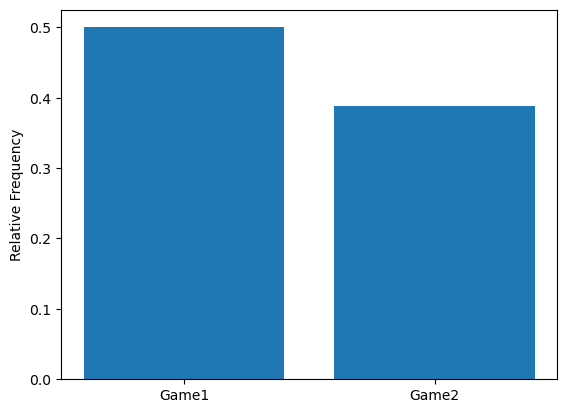

In [190]:
import matplotlib.pyplot as plt

Games = ['Game1','Game2']
relative_frequencies = [relative_freq_Game1,relative_freq_Game2]

#create bar chart
plt.bar(Games,relative_frequencies)
plt.ylabel('Relative Frequency')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [192]:
dice = np.array(['1','2','3','4','5','6'])

dice_1 = Die(dice)
dice_2 = Die(dice)
dice_3 = Die(dice)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [194]:
dice_2.weight_change('6',5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [196]:
dice_3.weight_change('1',5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [198]:
fair_dice_1 = Die(dice)
fair_dice_2 = Die(dice)
fair_dice_3 = Die(dice)
fair_dice_4 = Die(dice)
fair_dice_5 = Die(dice)

#set game
Game3 = Game([fair_dice_1,fair_dice_2,fair_dice_3,fair_dice_4,fair_dice_5])

#nrolls 10000
Game3.play(10000)
print(Game3.show_results('wide').head(10))

Die Number  Die 1 Die 2 Die 3 Die 4 Die 5
Roll Number                              
1               6     2     4     4     5
2               3     2     3     6     1
3               2     2     2     5     1
4               6     3     5     6     2
5               6     2     5     4     4
6               6     2     2     1     1
7               3     2     6     5     1
8               1     6     4     1     5
9               6     4     1     2     1
10              2     3     1     3     5


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [200]:
#create 2 unfair dice and 3 fair dice
fair_dice_1 = Die(dice)
unfair_dice_2 = Die(dice)
unffair_dice_3 = Die(dice)
fair_dice_4 = Die(dice)
fair_dice_5 = Die(dice)

unfair_dice_2.weight_change('6',5)
unffair_dice_3.weight_change('1',5)

#set game
Game4 = Game([fair_dice_1,unfair_dice_2,unffair_dice_3,fair_dice_4,fair_dice_5])

#nrolls 10000
Game4.play(10000)
print(Game4.show_results('wide').head(10))

Die Number  Die 1 Die 2 Die 3 Die 4 Die 5
Roll Number                              
1               1     6     1     1     2
2               5     6     1     6     2
3               4     4     3     5     3
4               2     5     2     2     6
5               5     5     6     2     6
6               1     6     1     6     3
7               4     6     1     4     3
8               1     6     6     2     6
9               3     6     5     3     2
10              1     6     1     6     4


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [202]:
#Analyzer dice_game

#Game3
Game3_analyzer = Analyzer(Game3)
Game3_jackpot = Game3_analyzer.jackpot()

#Game4
Game4_analyzer = Analyzer(Game4)
Game4_jackpot = Game4_analyzer.jackpot()


In [203]:
#number of rolls played by games
nrolls = 10000

#relative frequencies
relative_freq_Game3 = Game3_jackpot / nrolls
relative_freq_Game4

0.0005

In [204]:
relative_freq_Game4 = Game4_jackpot / nrolls
relative_freq_Game4

0.0004

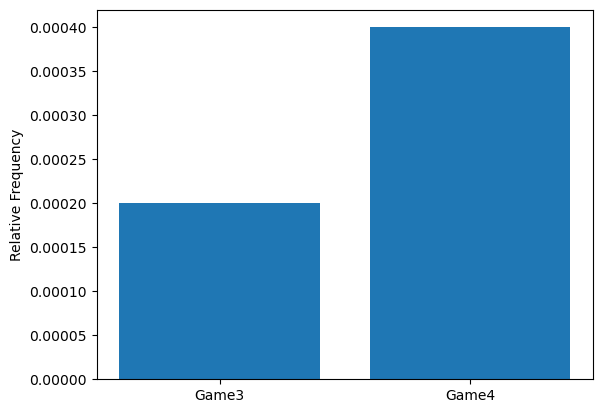

In [205]:
#Chart
import matplotlib.pyplot as plt

Dice_Games = ['Game3','Game4']
relative_frequencies = [relative_freq_Game3,relative_freq_Game4]

#create bar chart
plt.bar(Dice_Games,relative_frequencies)
plt.ylabel('Relative Frequency')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [242]:
letters_df = df = pd.read_csv("english_letters.txt", delim_whitespace=True,header=None, names=['Letter', 'Frequency'])
letters_df.head(10)

C:\Users\manga\AppData\Local\Temp\ipykernel_8472\206040871.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  letters_df = df = pd.read_csv("english_letters.txt", delim_whitespace=True,header=None, names=['Letter', 'Frequency'])


,Letter,Frequency
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057
5,N,313720540
6,S,294300210
7,R,277000841
8,H,216768975
9,L,183996130


In [264]:
sides = np.array(letters_df['Letter'])
letter_dice = Die(sides)
for _, row in letters_df.iterrows():
    letter_dice.weight_change(row["Letter"], row["Frequency"])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [269]:
letter_dice1 = letter_dice
letter_dice2 = letter_dice
letter_dice3 = letter_dice

Game5 = Game([letter_dice1,letter_dice2,letter_dice3])
Game5.play(1000)
print(Game5.show_results('wide').head(10))

Die Number  Die 1 Die 2 Die 3
Roll Number                  
1               W     D     L
2               T     N     E
3               A     I     R
4               S     E     H
5               R     C     E
6               L     W     A
7               T     D     L
8               H     S     T
9               J     F     E
10              F     T     Y


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [255]:
words_df = df = pd.read_csv("scrabble_words.txt", delim_whitespace=True, names=['words'])
words_df.head(10)

C:\Users\manga\AppData\Local\Temp\ipykernel_8472\1316183557.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  words_df = df = pd.read_csv("scrabble_words.txt", delim_whitespace=True, names=['words'])


,words
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS
5,AAL
6,AALII
7,AALIIS
8,AALS
9,AARDVARK


In [257]:
scrabble_analyzer = Analyzer(Game5)
permutations_df = analyzer.permutations().reset_index()

die_cols = [col for col in permutations_df.columns if col.startswith("Die")]
permutations_df["Word"] = permutations_df[die_cols].agg("".join, axis=1).str.upper()

# Step 3: Load Scrabble dictionary from file
with open("scrabble_words.txt") as file:
    scrabble_words = set(word.strip().upper() for word in file)

# Step 4: Compare and count valid words
permutations_df["IsWord"] = permutations_df["Word"].isin(scrabble_words)

# Step 5: Report results
valid_count = permutations_df["IsWord"].sum()
total_count = len(permutations_df)
invalid_count = total_count - valid_count

print(f"✅ Total unique permutations: {total_count}")
print(f"✅ Valid Scrabble words: {valid_count}")
print(f"❌ Invalid permutations (non-words): {invalid_count}")

✅ Total unique permutations: 968
✅ Valid Scrabble words: 0
❌ Invalid permutations (non-words): 968


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).